In [1]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

2024-06-24 07:04:40.620919: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-24 07:04:40.624163: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-24 07:04:40.664975: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-24 07:04:41.752113: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
START = "2023-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [4]:
data = load_data('BTC-USD')
df=data
df.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-01,16547.914062,16630.439453,16521.234375,16625.080078,16625.080078,9244361700
1,2023-01-02,16625.509766,16759.343750,16572.228516,16688.470703,16688.470703,12097775227
2,2023-01-03,16688.847656,16760.447266,16622.371094,16679.857422,16679.857422,13903079207
3,2023-01-04,16680.205078,16964.585938,16667.763672,16863.238281,16863.238281,18421743322
4,2023-01-05,16863.472656,16884.021484,16790.283203,16836.736328,16836.736328,13692758566


In [5]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,16547.914062,16630.439453,16521.234375,16625.080078,9244361700
1,16625.509766,16759.343750,16572.228516,16688.470703,12097775227
2,16688.847656,16760.447266,16622.371094,16679.857422,13903079207
3,16680.205078,16964.585938,16667.763672,16863.238281,18421743322
4,16863.472656,16884.021484,16790.283203,16836.736328,13692758566


## Visualize closing prices

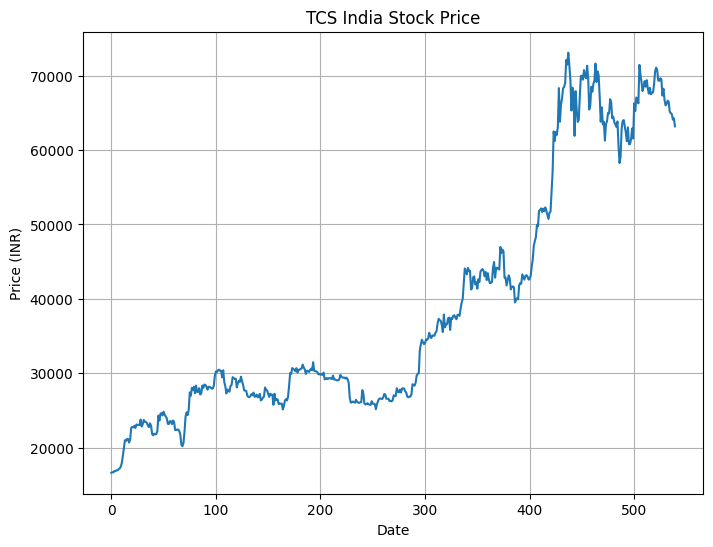

In [7]:
plt.figure(figsize=(8, 6))
plt.plot(df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()